In [1]:
using CSV, DataFrames, CairoMakie, wgregseq, Statistics

wgregseq.viz.default_makie!()

Precompiling wgregseq
        Info Given wgregseq was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? wgregseq
[ Info: Precompiling wgregseq [f8cc1c76-3494-412e-9b4b-01264b94fd02]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing wgregseq [f8cc1c76-3494-412e-9b4b-01264b94fd02].


In [2]:
prom = "ldrDp"
df = CSV.read(
    "./replicate_test/$prom/$prom-stats-2.txt", 
    DataFrame, 
    delim='\t',
    header=["growth_condition", "KST_sum", "KST_diff", "sigma"]
)
df.sigma = [parse.(Float64, split(df.sigma[i][2:end-1], ", ")) for i in 1:nrow(df)];

In [3]:
df

39×4 DataFrame
 Row │ growth_condition  KST_sum    KST_diff   sigma                           ⋯
     │ Int64             Float64    Float64    Array…                          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │                7  0.189346   0.1135     [0.60824, 0.909022, 0.742658, 0 ⋯
   2 │                5  0.108705   0.0592051  [0.92261, -0.0623502, -0.350602
   3 │                2  0.168218   0.0878333  [0.228568, 0.608022, 0.748646,
   4 │                1  0.227449   0.0837692  [-0.134074, -0.0431162, 0.86838
   5 │                3  0.100564   0.0474231  [0.553851, 0.248629, 0.360978,  ⋯
   6 │                8  0.281821   0.0994872  [0.334936, 0.757205, 0.202093,
   7 │                6  0.128423   0.0552821  [-0.873149, -0.459849, -0.67565
   8 │                4  0.215846   0.0701795  [0.928236, 0.906761, 0.609473,
   9 │                9  0.169026   0.0761795  [0.614767, 0.65449, 0.132319, 0 ⋯
  10 │               12  0.135449   0.0959615  [0.659859, -0.484171, -0.739018
  11 │               10  0.382538   0.102218   [0.575846, 0.462146, 0.588831,
  ⋮  │        ⋮              ⋮          ⋮                      ⋮               ⋱
  30 │               33  0.109115   0.0521282  [0.445048, 0.372312, 0.346592,
  31 │               35  0.157756   0.0873462  [-0.314263, -0.597786, -0.54221 ⋯
  32 │               37  0.258526   0.131744   [0.0768836, 0.789146, 1.00364,
  33 │               34  0.229974   0.120808   [-1.2937, -0.315395, -0.427767,
  34 │               36  0.185667   0.0622692  [0.711472, 0.75708, -0.412601,
  35 │               31  0.166333   0.132474   [0.517788, 0.305287, -0.0103129 ⋯
  36 │               38  0.301192   0.148385   [0.457646, 0.482418, 0.365428,
  37 │               41  0.31291    0.112269   [0.824586, 1.01063, 0.790756, 0
  38 │               39  0.151026   0.0744872  [0.88661, 0.958191, 0.90791, 0.
  39 │               40  0.420654   0.0986026  [1.00257, 0.602153, 0.467663, - ⋯
                                                    1 column and 18 rows omitted

In [4]:
sort!(df, [:growth_condition])

39×4 DataFrame
 Row │ growth_condition  KST_sum   KST_diff   sigma                            ⋯
     │ Int64             Float64   Float64    Array…                           ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │                1  0.227449  0.0837692  [-0.134074, -0.0431162, 0.868381 ⋯
   2 │                2  0.168218  0.0878333  [0.228568, 0.608022, 0.748646, 0
   3 │                3  0.100564  0.0474231  [0.553851, 0.248629, 0.360978, 0
   4 │                4  0.215846  0.0701795  [0.928236, 0.906761, 0.609473, 0
   5 │                5  0.108705  0.0592051  [0.92261, -0.0623502, -0.350602, ⋯
   6 │                6  0.128423  0.0552821  [-0.873149, -0.459849, -0.67565,
   7 │                7  0.189346  0.1135     [0.60824, 0.909022, 0.742658, 0.
   8 │                8  0.281821  0.0994872  [0.334936, 0.757205, 0.202093, 0
   9 │                9  0.169026  0.0761795  [0.614767, 0.65449, 0.132319, 0. ⋯
  10 │               10  0.382538  0.102218   [0.575846, 0.462146, 0.588831, 0
  11 │               11  0.320628  0.0603846  [0.341731, 0.200233, 0.679472, 0
  ⋮  │        ⋮             ⋮          ⋮                      ⋮                ⋱
  30 │               32  0.206718  0.108718   [0.465679, 0.474603, 0.327725, 0
  31 │               33  0.109115  0.0521282  [0.445048, 0.372312, 0.346592, 0 ⋯
  32 │               34  0.229974  0.120808   [-1.2937, -0.315395, -0.427767,
  33 │               35  0.157756  0.0873462  [-0.314263, -0.597786, -0.542212
  34 │               36  0.185667  0.0622692  [0.711472, 0.75708, -0.412601, 0
  35 │               37  0.258526  0.131744   [0.0768836, 0.789146, 1.00364, 0 ⋯
  36 │               38  0.301192  0.148385   [0.457646, 0.482418, 0.365428, 0
  37 │               39  0.151026  0.0744872  [0.88661, 0.958191, 0.90791, 0.9
  38 │               40  0.420654  0.0986026  [1.00257, 0.602153, 0.467663, -2
  39 │               41  0.31291   0.112269   [0.824586, 1.01063, 0.790756, 0. ⋯
                                                    1 column and 18 rows omitted

In [5]:
df[df.growth_condition .== 38, :sigma]

1-element Vector{Vector{Float64}}:
 [0.4576462142328815, 0.4824181628509941, 0.365428251093721, 0.7427446982634968, 0.6333942312047373, 0.6773029973030886, 0.7635411206605517, 0.7141198006067004, -0.04598264887772766, 0.6534506003560557  …  0.20891824519985805, 0.2542084363745862, 0.16841099470699686, 0.30641244568029885, 0.2995970243416261, 0.029824629450507515, -0.003453276025649838, -1.1244624448225613, -0.420072907985566, 0.244400020982428]

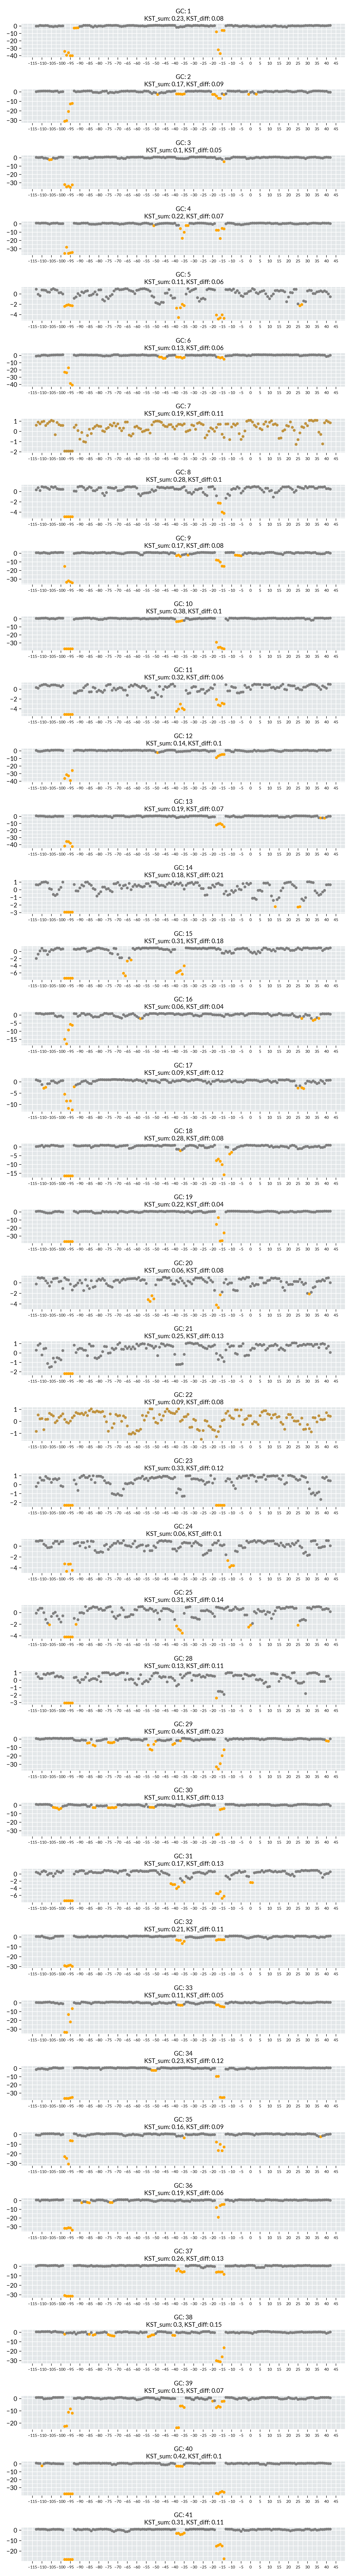

In [6]:
fig = Figure(size=(800, 150*nrow(df)))

for i in 1:nrow(df)
    ax = Axis(fig[i, 1], title="GC: $(df[i, :growth_condition])\n KST_sum: $(round(df[i, :KST_sum], digits=2)), KST_diff: $(round(df[i, :KST_diff], digits=2))", xticks=-115:5:45, xticklabelsize=9, )
    scatter!(ax, -113:42, df.sigma[i], color=df.sigma[i] .< -2, colormap=["gray", "orange"])
end

fig

In [14]:
df_map = wgregseq.utils.get_mapping_data()
promoters = df_map.name;

In [15]:
# Get all growth condition indexes
gcs = unique([x[1] for x in split.(vcat(
                    readdir("../../../data/barcode_counts/20230907_barcode/"), 
                    readdir("../../../data/barcode_counts/20231207_barcode/"),
                    readdir("../../../data/barcode_counts/20240907_barcode/"),
                    readdir("../../../data/barcode_counts/20240621_barcode/")
                    ), "_")])
filter!(x -> x != ".DS", gcs)
# get list of growth condition labels
gcs = [split(x, '-')[1] for x in gcs] |> unique
growth_conditions = CSV.read("growth_conditions.csv", DataFrame, delim=';')

function get_gc_info(gc)
    gc, info = growth_conditions[gc, [:Condition, :Description]]
    if ismissing(info)
        info = ""
    end
    return gc
end

get_gc_info (generic function with 1 method)

In [16]:
skip_conditions = Dict(
        "22" => "1", 
        "38" => "2", 
        "19" => "1",
        "15" => "1",
        "14" => "2",
        "25" => "2",
        "40" => "2",
        "31" => "2",
        "4" => "1",
        "13" => "2",
    )

Dict{String, String} with 10 entries:
  "40" => "2"
  "4"  => "1"
  "38" => "2"
  "19" => "1"
  "15" => "1"
  "25" => "2"
  "31" => "2"
  "22" => "1"
  "13" => "2"
  "14" => "2"

In [35]:
df_BS = DataFrame()
for prom in df_map.name |> unique
    if prom in ["galEp", "ybeDp2"]
        continue
    end
    df_stats = CSV.read(
        "./replicate_test/$prom/$prom-stats-2.txt", 
        DataFrame, 
        delim='\t',
        header=["growth_condition", "KST_sum", "KST_diff", "sigma"]
    );
    df_stats.sigma = [parse.(Float64, split(df_stats.sigma[i][2:end-1], ", ")) for i in 1:nrow(df_stats)];
    sort!(df_stats, [:growth_condition])
    for i in 1:nrow(df_stats)
        footprints = filter(x -> split(x, '-')[1] == string(df_stats[i, :growth_condition][1]), readdir("footprints"))
        for footprint in footprints
            gc = split(footprint, '-')[1]
            rep = split(split(footprint, '_')[1], '-')[2]
            if gc in collect(keys(skip_conditions))
                if skip_conditions[gc] == rep
                    continue
                end
            end
            df = CSV.read("footprints/$footprint", DataFrame)
             
            break
        end
        y = df[(df.promoter .== prom) .& (df.d .== 2), :mut_info]
        if df_stats[i, :KST_sum] > 0.1 || df_stats[i, :KST_diff] > 0.1
            bs_arr = []
            pos_arr = []
            S = df_stats[i, :sigma]
            for i in 1:length(S)
                if S[i] < -2 && y[i] > mean(y)
                    if length(pos_arr) == 0
                        push!(pos_arr, i - 114)
                        push!(bs_arr, 1)
                    else
                        if i - pos_arr[end] - 114 < 4
                            push!(pos_arr, i - 114)
                            push!(bs_arr, bs_arr[end])
                        else
                            push!(pos_arr, i - 114)
                            push!(bs_arr, bs_arr[end] + 1)
                        end
                    end
                end
            end
                
            append!(df_BS, DataFrame(promoter = prom, pos = pos_arr, binding_site = bs_arr, gc=df_stats[i, :growth_condition]))
        end 
    end
end

In [36]:
df_BS[(df_BS.promoter .== "cusCp") .& (df_BS.gc .== 38), :]

28×4 DataFrame
 Row │ promoter  pos  binding_site  gc    
     │ String    Any  Any           Int64 
─────┼────────────────────────────────────
   1 │ cusCp     -52  1                38
   2 │ cusCp     -51  1                38
   3 │ cusCp     -50  1                38
   4 │ cusCp     -49  1                38
   5 │ cusCp     -48  1                38
   6 │ cusCp     -47  1                38
   7 │ cusCp     -42  2                38
   8 │ cusCp     -41  2                38
   9 │ cusCp     -40  2                38
  10 │ cusCp     -39  2                38
  11 │ cusCp     -38  2                38
  ⋮  │    ⋮       ⋮        ⋮          ⋮
  19 │ cusCp     -13  4                38
  20 │ cusCp     -12  4                38
  21 │ cusCp     -11  4                38
  22 │ cusCp     -10  4                38
  23 │ cusCp     -9   4                38
  24 │ cusCp     -8   4                38
  25 │ cusCp     -6   4                38
  26 │ cusCp     -5   4                38
  27 │ cusCp     -3   4                38
  28 │ cusCp     -2   4                38
                            7 rows omitted

In [38]:
for prom_df in groupby(df_BS, :promoter)
    fig = Figure(size=(700, 700))
    
    x = filter(x -> x ∉ [26, 27], collect(1:41))
    
    ax = Axis(fig[1, 1], xticks=(-110:10:40), yticks=(x, get_gc_info.(x)), title=prom_df.promoter[1])
    xlims!(-120, 50)
    ylims!(0, 42)
    for gdf in groupby(prom_df, :gc)
        for bs_df in groupby(gdf, :binding_site)
            lines!(ax, sort(bs_df.pos), bs_df.gc, linewidth=2, color="gray")
        end
    end
    save("hypothesis/$(prom_df.promoter[1])_2_predicted_sites.pdf", fig)
end


In [37]:
CSV.write("hypothetical_BS.csv", df_BS)

"hypothetical_BS.csv"

In [39]:
skip_conditions = Dict(
        "22" => "1", 
        "38" => "2", 
        "19" => "1",
        "15" => "1",
        "14" => "2",
        "25" => "2",
        "40" => "2",
        "31" => "2",
        "4" => "1",
        "13" => "2",
    )

x = filter(x -> x ∉ [26, 27], collect(1:41))
for prom_df in groupby(df_BS, :promoter)
    fig = Figure(size=(1200, 200 * 39)) 
    
    for i in x
        ax1 = Axis(fig[i, 1], xticks=(-110:10:40), title=get_gc_info(i), xlabel="position relative to TSS", ylabel="mutual info [bits]")
        ax2 = Axis(fig[i, 2], xticks=(-110:10:40), xlabel="position relative to TSS", ylabel="mutual info [bits]")
        ax = [ax1, ax2]
        xlims!(-120, 50)

        footprints = filter(x -> split(x, '-')[1] == string(i), readdir("footprints"))
        
        j = 1
        gdf = prom_df[prom_df.gc .== i, :]
        for footprint in footprints
            gc = split(footprint, '-')[1]
            rep = split(split(footprint, '_')[1], '-')[2]
            if gc in collect(keys(skip_conditions))
                if skip_conditions[gc] == rep
                    continue
                end
            end
            df = CSV.read("footprints/$footprint", DataFrame)
            y = df[(df.promoter .== prom_df.promoter[1]) .& (df.d .== 2), :mut_info]
            barplot!(ax[j], -113:42, y, gap=0)
            for bs_df in groupby(gdf, :binding_site)
                _x = convert(Vector{Int64}, sort(bs_df.pos)) .- 0.5
                push!(_x, _x[end] + 1)
                band!(ax[j], _x, fill(0, length(bs_df.pos) + 1), fill(maximum(y),length(bs_df.pos) + 1), color=("gray", 0.3))
                #lines!(ax, sort(bs_df.pos), bs_df.gc, linewidth=2, color="gray")
            end
            j += 1
        end
        
    end
    save("hypothesis/$(prom_df.promoter[1])_2_predicted_sites_w_footprints.pdf", fig)
end


In [19]:
fig = Figure(size=(800, 150*nrow(df)))

for i in 1:nrow(df)
    ax = Axis(fig[i, 1], title="GC: $(df[i, :growth_condition])\n KST_sum: $(round(df[i, :KST_sum], digits=2)), KST_diff: $(round(df[i, :KST_diff], digits=2))", xticks=-115:5:45, xticklabelsize=9, )
    scatter!(ax, -114:43, df.sigma[i], color=df.sigma[i] .< -2, colormap=["gray", "orange"])
end

fig

LoadError: ArgumentError: column name :KST_sum not found in the data frame